# TensorFlow - MNIST For ML Beginners - Next Step (Part III - DNN) 

This Code Along tutorial is an extension of TensorFlow.org's MNIST For ML Beginners tutorial. They describe this as the Hello World example for those just starting to use TensorFlow. In this tutorial, we extend it from a two-layer softmax regression neural network to a four layer deep neural network (DNN) with two hidden layers.

In [1]:
# Importing Tensorflow
import tensorflow as tf
from tensorflow.python.framework import ops

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## What is MNIST

The MNIST dataset is a well-known dataset of images of handwritten digits (0 .. 9). It is used extensively as an example for
training beginners in both Computer Vision and ML frameworks. 

Kaggle describes this dataset as:

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Images

<img src='mnist.png'>

Each image has a label, between 0 and 9 and represents a single digit. Each image is 28 pixels by 28 pixels. The pixels are black or white (0 or 1). Each image represents a total of 784 pixels (28 x 28)

## Getting the Data

Tensorflow comes with several builtin datasets to get started. These are located in the package tensorflow.examples.tutorials.

The dataset contains a total of 70,000 images, split up as follows:

- 55,000 training data
- 10,000 test data
- 5,000 validation data

Let's start by getting the data from tensorflow.

In [2]:
# Import the MNIST input_data function from the tutorials.mnist package
from tensorflow.examples.tutorials.mnist import input_data

# Read in the data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's now look at what type of object 'mnist' is:

In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

You can see that it is a Tensorflow object of type Datasets. The training, test and validation data can be accessed
as attributes. 

Let's look at their data types. We can see they are Tensorflow Dataset (non-plural) data types.

In [4]:
print( type(mnist.train) )
print( type(mnist.test) )
print( type(mnist.validation) )

<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


## Inside the Dataset

Let's now look closer to what's inside the Tensorflow dataset object for the MNIST dataset. 

The images and corresponding labels are accessed by the attributes images and labels, respectively. How convenient, such a logical name for an attribute! 

Both the images and labels are a Numpy multi-dimensional array.

In [5]:
type(mnist.train.images)

numpy.ndarray

Let's check that the training data has the expected 55,000 images and labels.

In [6]:
# Let's get the length (number of images) of the list of images.
print( len(mnist.train.images) )
print( len(mnist.train.labels) )

55000
55000


Let's now look at the contents of one of the images.

In [7]:
mnist.train.images[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

The original black and white (bilevel) images from MNIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  - http://yann.lecun.com/exdb/mnist/

### Plotting an Image

Let's plot one of the images in the training set. To do so, we will use the plotting functions of the matplotlib package. Let's start by importing the package.

In [8]:
import matplotlib.pyplot as plt

# This line is specific to python notebooks (not python). 
# It causes plots to automatically be rendered (displayed) without issuing a show command.
%matplotlib inline  

Let's now render (display) one of the images. 

<b>WAIT</b>, the images in the Tensorflow MNIST dataset are already flattened. That is, they are a single vector of 784 inputs. To display it, we need to reshape the vector back into a 28 x 28 pixel matrix. Then we can plot it.

(784,)
(28, 28)


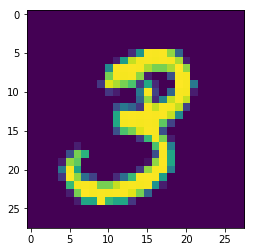

In [9]:
# Let's show that the shape of the image is already flatten (will output as 784)
print( mnist.train.images[1].shape )

# Let's now reshape it into a 28 x 28 matrix
image = mnist.train.images[1].reshape(28,28)
print( image.shape )

# Let's plot it now
plt.imshow( image )

### The Labels

The corresponding labels are a 2D matrix. Each row is for the corresponding image (that is index 0 in labels is for image at index 0 in images).

Each row has ten columns. The labels have been encoded as a one-hot encoding. In this case, if the image is a 3, then there is a 1 at index 3, and all the other columns are a zero.

Let's look at the label vector for the image above.

In [10]:
# As you can see, there is a 1 at index 3 (fourth location, starting at 0)
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## Deep Neural Network - Softmax Activation

We are going to build a simple deep neural network (DNN). There will not be a convolutional layer. That is, we will use all 784 pixels as input. The output layer from our neural network will be passed through a softmax activation function to produce our predictions of the digit.

In our Neural Network, we will have the following:

    - An input layer of 784 inputs and 64 outputs
    - A linear recitifier activation function
    - A first hidden layer of 64 inputs and 32 outputs
    - A linear recitifier activation function
    - A second hidden layer of 32 inputs and 20 outputs
    - A linear recitifier activation function
    - An output layer of 20 inputs and 10 outputs
    - A softmax activation function

INPUT LAYER => RELU => HIDDEN LAYER => RELU => HIDDEN LAYER => RELU => OUTPUT LAYER => SOFTMAX

### Softmax

We will use the softmax layer to make our predictions. Each output from softmax will be a number between 0 and 1, representing a percent. That is, if the output for the node 3 is 0.8, then this means 80% prediction. We will choose the output with the highest percent when making a prediction.

Softmax is a mathematical function that takes a set of values, which may otherwise not add up to 1, and outputs a new set of numbers when totaled will add up to 1. That is, we use softmax() so that all our outputs for each image add up to 1 (100%).

Softmax will be our 'activation' function from the output layer.

## Building the Neural Network

Let's build our neural network now. We will do the following:

### Design, then Run

#### Design

    - Create the placeholder for the input data
    - Design the layers
    - Set the optimizer
    
#### Run

      -- Initialize the Graph
      -- Set number of epochs
      -- Set batch size, learning rate
      -- Run the Graph with the Training Data to Train (learn) the Model
      -- Validate the Model with Test Data

### Input Vector and Output Vector Placeholders

For our first tensorflow step, we will setup the Tensorflow placeholders.

We have two placeholders we need to declare, one for the input vector (pixel image data) and one for the output vector (digit classifier).

For our input placeholder (which we call X), we have 784 features (pixels per image). For the output vector (which we call Y), we have have 10 classifiers (0 .. 9 digits). In both cases, we set the second dimension of our vector to None. The None is
a placeholder for the number of samples we will feed into the neural network at run-time. We also know that our data is floating point values between 0 and 1, so we will set the data type to float32.

In [11]:
# Let's first reset our graph, so our neural network components are all declared within the same graph
ops.reset_default_graph() 

In [12]:
X = tf.placeholder(tf.float32, [784, None])
Y = tf.placeholder(tf.float32, [10, None])

### INPUT LAYER

Let's now design our input layer. We need two things: weights and biases. 

Each input feature (pixel) will need a weight (which our model will learning during training). The weight is multipled against the value of the input (pixel), which we symbolically represent as Wx. 

Each output from the layer will need a bias (which our model will learning during training). The bias is added to the result of the weight multipled by the pixel value (Wx).

Let's create two tensorflow variables for our weights and biases. The weights (which we call W) will need to be a 2D matrix. The rows are the number of inputs, which is 784 and the columns the number of outputs to the hidden layer, which will be 64.

The bias will be a vector of size 64 (one for each output).

We need to initialize our weights and biases to some initial value. We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [13]:
tf.set_random_seed(1)   # Set the same seed to get the same initialization as in this demo.

# The weights for the input layer
W1 = tf.get_variable("W1", [64, 784], initializer=tf.contrib.layers.xavier_initializer(seed=1))

# The bias for the output from the input layer
b1 = tf.get_variable("b1", [64, 1], initializer=tf.zeros_initializer())

Let's put it together into an input layer. We will use the Tensorflow method tf.matmul() to do a matrix multiplication of the weights (our variable W1) and the inputs (our placeholder X), add in the bias (b1), and pass the output through a linear activation function.

- Create a node that will multiply the weights (W1) against the input vector (X - which is our input placeholder).
- Create a node that adds the bias to the above node (W1 * X)
- Pass the outputs from the input layer through a RELU activation function

In [14]:
# The first layer (input layer)
Z1 = tf.add(tf.matmul(W1, X), b1)

# Let's add the activation function to the output signal from the first layer
A1 = tf.nn.relu(Z1)

### FIRST HIDDEN LAYER

The first hidden layer will have 64 inputs (outputs from input layer) and 32 outputs. Each input will need a weight and each output a bias (which we will train). Each output will be passed through the linear rectifier unit (RELU) activation function.

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [15]:
W2 = tf.get_variable("W2", [32, 64], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable("b2", [32, 1], initializer=tf.zeros_initializer())

Let's construct the first hidden layer

- Create a node that will multiply the weights (W2) against the outputs of the input layer (A1).
- Create a node that adds the bias to the above node (W2 * A1)
- Pass the outputs from the (first) hidden layer through a RELU activation function

In [17]:
# The second layer (first hidden layer)
Z2 = tf.add(tf.matmul(W2, A1), b2) 

# Let's add the activation function to the output signal from the second layer
A2 = tf.nn.relu(Z2)

### SECOND HIDDEN LAYER

The second hidden layer will have 32 inputs (outputs from first hidden layer) and 20 outputs. Each input will need a weight and each output a bias (which we will train). Each output will be passed through the linear rectifier unit (RELU) activation function.

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [18]:
W3 = tf.get_variable("W3", [20, 32], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable("b3", [20, 1], initializer=tf.zeros_initializer())

Let's construct the second hidden layer

- Create a node that will multiply the weights (W3) against the outputs of the first hidden layer (A2).
- Create a node that adds the bias to the above node (W3 * A2)
- Pass the outputs from the second hidden layer through a RELU activation function

In [19]:
# The third layer (second hidden layer)
Z3 = tf.add(tf.matmul(W3, A2), b3) 

# Let's add the activation function to the output signal from the third layer
A3 = tf.nn.relu(Z3)

### OUTPUT LAYER

The output layer will have 20 inputs (outputs from the second hidden layer) and 10 outputs (one for each digit). Each input will need a weight and each output a bias (which we will train). The 10 outputs will be passed through a softmax activation function. 

We will initialize the weights using a random value initializer (Xavier) and initialize the biases to zero.

In [20]:
W4 = tf.get_variable("W4", [10, 20], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b4 = tf.get_variable("b4", [10, 1], initializer=tf.zeros_initializer())

Let's construct the output layer

- Create a node that will multiply the weights (W4) against the outputs of the second hidden layer (A3).
- Create a node that adds the bias to the above node (W3 * A3)
- Pass the outputs from the output layer through a SOFTMAX squashing function (done by the optimizer)

In [21]:
# The fourth layer (output layer)
Z4 = tf.add(tf.matmul(W4, A3), b4) 

## OPTIMIZER

Now its time to design our optimizer. Let's start by designing our cost function. We will use the mean value of the softmax cross entropy between the predicted labels and actual labels. This is what we want to reduce on each batch.

In [22]:
# to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(Z4), labels=tf.transpose(Y)))

Let's design our optimizer. This is the method that adjusts the values of the weights and biases, based on minizing the cost value during training.

We also need to set a learning rate. This is multiplied against the gradient calculation. It's used to prevent huge swings in setting weights which can result in either converging at a local (instead of global) optima, or not converging at all (infinite gradient).

In [23]:
# The learning rate for Gradient Descent algorithm
learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Run the Graph

We've built our Tensorflow graph for training our data. So, let's start training it.

First, we need to call Tensorflow's global_variables_initializer() method to initialize the variables we've defined. We will create this as another node, which will be the first node we run (evaluate) in our graph.

In [24]:
init = tf.global_variables_initializer()

It's also a good idea to know how long your training takes, so let's import the time library.

In [25]:
import time

Let's set our hyperparameters.

We need to set the number of epochs (that's how many times we run the training data through the neural network), and the batch size. The batch size is a small subset of the entire training set. We will be running a batch at a time per epoch. After each batch, then the cost is computed and backpropagated through the neural network.

In [26]:
epochs = 20                                    # run a 20 epochs
batch_size = 200                               # for each epoch, train in batches of 200 images
number_of_images = mnist.train.labels.shape[0] # number of images in training data
batches = number_of_images // batch_size       # number of batches in an epoch
print("Number of batches:", batches)

Number of batches: 275


We are going to run the graph now!

We start by creating a tensorflow session (tf.Session()). Within the session we can run (evaluate) parts of the graph we designed.

We start by initializing the tensor variables we defined for the weights and biases.

We then run our training data through our neural network for the number of epochs we defined. For each epoch, we get a randomly shuffled batch from the training data and feed the batch (i.e. feed dictionary) into the neural network by running (evaluate)
the optimizer node in our graph.

Once we've trained the model, then we create some new nodes to calculate accuracy and evaluate against the training data.

In [27]:
start = time.time()

with tf.Session() as sess:
    # Initialize the variables
    sess.run(init)
    
    # run our training data through the neural network for each epoch
    for epoch in range(epochs):
        
      epoch_cost = 0
      
      # Run the training data through the neural network
      for batch in range(batches):
          # Get a batch (random shuffled) from the training data
          batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
          # Feed this batch through the neural network.
          _, batch_cost = sess.run([optimizer, cost], feed_dict={X: batch_xs.T, Y: batch_ys.T})
            
          epoch_cost += batch_cost
      
      print("Epoch: ", epoch, epoch_cost / batches)
        
    end = time.time()
    
    print("Training Time:", end - start)
    
    # Test the Model
    
    # Let's select the highest percent from the softmax output per image as the prediction.
    prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))
    
    # Let's create another node for calculating the accuracy
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

    # Now let's run our trainingt images through the model to calculate our accuracy during training
    print ("Train Accuracy:", accuracy.eval({X: mnist.train.images.T, Y: mnist.train.labels.T}))
    
    # Now let's run our test images through the model to calculate our accuracy on the test data
    print ("Test Accuracy:", accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T}))

Epoch:  0 0.5975920818881555
Epoch:  1 0.19090897267515008
Epoch:  2 0.1331266784938899
Epoch:  3 0.10391825139522552
Epoch:  4 0.08954275605353441
Epoch:  5 0.07757623539729552
Epoch:  6 0.0662328108840368
Epoch:  7 0.059193220721049745
Epoch:  8 0.052124946100467986
Epoch:  9 0.04593665284866637
Epoch:  10 0.04284971629269421
Epoch:  11 0.03699113753539595
Epoch:  12 0.03401294217444956
Epoch:  13 0.033596006249162286
Epoch:  14 0.030590495252135124
Epoch:  15 0.023505739998495714
Epoch:  16 0.02281758645718748
Epoch:  17 0.021548156231027942
Epoch:  18 0.020883389256725258
Epoch:  19 0.020294744281352244
Training Time: 24.267378330230713
Train Accuracy: 0.9966909
Test Accuracy: 0.974


### Evaluate of Model

The last three steps above is where our test data was ran through the model and produced how accurate our model was on the test data.

After training the model, we created a node for prediction. This node compares two vectors, our predicted labels and our actual labels. Each vector is 10 elements long with a 1 in the predicted/actual digit location. So we are comparing the vectors. If they match (prediction matches actual), then we have a TRUE; otherwise a FALSE. That's how we are going to get our accuracy percentage calculated.

Next, we create the node accuracy. This node is a cost function!

We then run the accuracy node, feeding it the test images as the X variable and the test labels as the Y variable. This will result in the test images being ran through the model (which is in memory) and the corresponding output vectors evaluated against the actual labels of the test images (Y).

## You Have Now Completed TensorFlow's MNIST Example Extended to a DNN

As you can see, by adding a second hidden layer and running all the training data through the neural network, we have increased the accuracy on the test data from 96% to 97%, over the FCNN (single hidden layer).